In [10]:
#Option Price comparison between Black Scholes and Monte Carlo
import numpy as np
from math import sqrt, log, exp
from scipy.stats import norm

rng=np.random.default_rng(1232)

def mc_eur_call(S0,K,r,sigma,T,N):
    Z=rng.normal(0,1,N)
    S_T= S0*np.exp((r-(0.5*sigma**2))*T + sigma*np.sqrt(T)*Z)
    payoff = np.maximum(S_T-K,0.0)
    disc_payoff= np.exp(-r*T)*(payoff)
    price=np.mean(disc_payoff)
    sd=disc_payoff.std(ddof=1)/np.sqrt(N)
    c1,c2= price-sd*1.96, price+sd*1.96
    return price, (c1, c2)

def bs_call(S0,K,r,sigma,T):
    d1=(log(S0/K)+(r + (sigma**2)/2))/sigma*sqrt(T)
    d2=d1-sigma*sqrt(T)
    price=S0*norm.cdf(d1) - K*exp(-r*T)*norm.cdf(d2)
    return price
    
price1,ci= mc_eur_call(95,100,.03,.2,1,1000000)
price2= bs_call(95,100,.03,.2,1)
if ci[0]<price2<ci[1]:
    print(f"The BS price is {price2:.2f} which is in range of the Monte Carlo price {price1:.2f}")
print(f"The price of the option using Monte Carolo is: {price1 :.2f} with confidence interval of 95% the range is {ci[0]:.2f} and {ci[1]:.2f}")

The BS price is 6.67 which is in range of the Monte Carlo price 6.66
The price of the option using Monte Carolo is: 6.66 with confidence interval of 95% the range is 6.64 and 6.69


In [21]:
import numpy as np
from math import sqrt, log, exp
from scipy.stats import norm

rng=np.random.default_rng(1232)

def mc_eur_call_anti(S0,K,r,sigma,T,N):
    Z1=rng.normal(0,1,N)
    Z2=-Z1
    S_T_1= S0*np.exp((r-(0.5*sigma**2))*T + sigma*np.sqrt(T)*Z1)
    S_T_2=S0*np.exp((r-(0.5*sigma**2))*T + sigma*np.sqrt(T)*Z2)
    payoff1 = np.maximum(S_T_1-K,0.0)
    payoff2 = np.maximum(S_T_2-K,0.0)
    disc_payoff_1= np.exp(-r*T)*(payoff1)
    disc_payoff_2= np.exp(-r*T)*(payoff2)
    #price1=np.mean(disc_payoff_1)
    #price2=np.mean(disc_payoff_2)
    X_hat=(disc_payoff_1+disc_payoff_2)/2
    price=np.mean(X_hat)
    sd=(X_hat).std(ddof=1)/np.sqrt(N)
    c1,c2= price-sd*1.96, price+sd*1.96
    return price, (c1, c2),sd

def mc_eur_call(S0,K,r,sigma,T,N):
    Z=rng.normal(0,1,N)
    S_T= S0*np.exp((r-(0.5*sigma**2))*T + sigma*np.sqrt(T)*Z)
    payoff = np.maximum(S_T-K,0.0)
    disc_payoff= np.exp(-r*T)*(payoff)
    price=np.mean(disc_payoff)
    sd=disc_payoff.std(ddof=1)/np.sqrt(N)
    c1,c2= price-sd*1.96, price+sd*1.96
    return price, (c1, c2),sd
    
price1,ci1,se1= mc_eur_call(95,100,.03,.2,1,100000)
price2,ci2,se2= mc_eur_call_anti(95,100,.03,.2,1,100000)

variance_reduction_factor=se1**2/se2**2
print(f"The Variance Reduction Factor from using -Z values was: {variance_reduction_factor:.3f}")
print(f"{price1:.2f}, {ci1[0]:.2f},{ci1[1]:.2f}")


The Variance Reduction Factor from using -Z values was: 2.957
6.71, 6.64,6.78


In [24]:
import numpy as np

rng=np.random.default_rng(1234)

def mc_asian_arith_call(S0,K,r,sigma,T,M,N):
    Z=rng.normal(0,1,(N,M))
    S_t=np.zeros((N,M))
    S_t[:,0]=S0
    dT=T/M

    drift=(r-(0.5*sigma**2))*dT
    vol=sigma*np.sqrt(dT)

    for t in range(1,M):
        S_t[:,t]=S_t[:,t-1]*np.exp(drift+vol*Z[:,t-1])
    
    avg_price=S_t.mean(axis=1)
    payoff=np.maximum(avg_price-K,0.0)
    disc_payoff=np.exp(-r*T) * payoff
    price=np.mean(disc_payoff)

    return(price)

price_asian=mc_asian_arith_call(100,105,.03,.15,1,252,100000)

print(f"Price of the Asian option with strike 105 when underlying price is at 100: {price_asian :.2f}")
        
    

Price of the Asian option with strike 105 when underlying price is at 100: 2.03


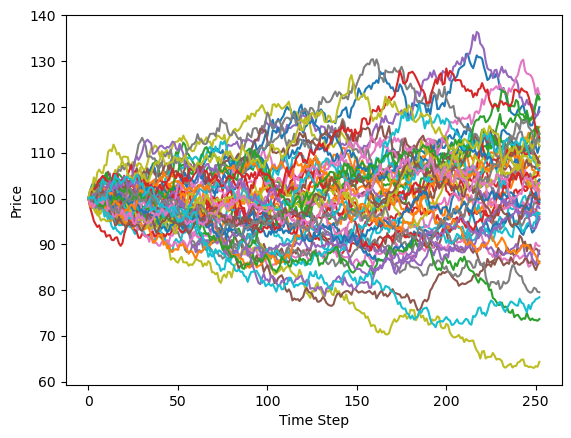

Price of the Asian option with strike 105 when underlying price is at 100: 2.1164


In [43]:
import numpy as np
import matplotlib.pyplot as plt

rng=np.random.default_rng(1234)

def mc_asian_arith_call_vectorized(S0,K,r,sigma,T,M,N):
    Z=rng.normal(0,1,(N,M))
    S_t=np.zeros((N,M+1))
    S_t[:,0]=S0
    dT=T/M

    drift=(r-(0.5*sigma**2))*dT
    vol=sigma*np.sqrt(dT)
    log_path=drift+vol*Z
    log_returns=np.cumsum(log_path,axis=1)
    S_t[:,1:]=S0*np.exp(log_returns)
    
    avg_price=S_t.mean(axis=1)
    payoff=np.maximum(avg_price-K,0.0)
    disc_payoff=np.exp(-r*T) * payoff
    price=np.mean(disc_payoff)

    plt.plot(S_t[:50,].T)
    plt.xlabel("Time Step")
    plt.ylabel("Price")
    plt.show()

    return price

price_asian=mc_asian_arith_call_vectorized(100,105,.03,.15,1,252,10000)
print(f"Price of the Asian option with strike 105 when underlying price is at 100: {price_asian :.4f}")
